# **JPEG COMPRESSION**

![](https://imgv3.fotor.com/images/side/batch-compress-jpeg-to-40kb-in-fotor.png)

1. Load the Image: Uses cv2.imread() to load the image in BGR format.
2. Convert to YCbCr: Converts the image to YCbCr color space using cv2.cvtColor().
3. Split Channels: Splits the Y, Cb, and Cr channels for further processing.
4. Subsample Chrominance: Resizes the Cb and Cr channels to reduce their resolution, typically using bilinear interpolation.
5. Merge Channels: Combines the Y channel with the subsampled Cb and Cr channels back into a single YCbCr image.
6. Save Compressed Image: Uses cv2.imencode() to compress the image with the specified JPEG quality and save it.
7. Optional Visualization: Decodes and displays the compressed image using OpenCV's GUI functions.

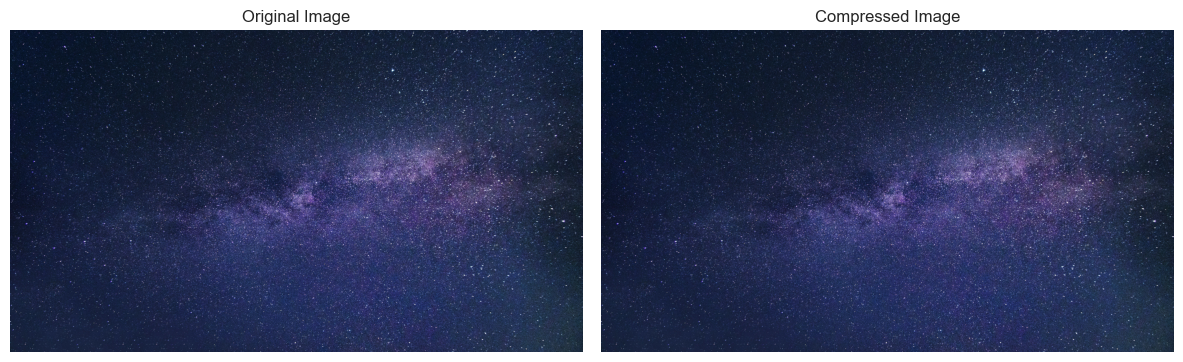

Original Image Size: 4992.78 KB
Compressed Image Size: 3138.68 KB


In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# 1. Load the original image
image = cv2.imread('wmm.jpg')

# 2. Convert from BGR to YCbCr
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# 3. Split the YCbCr channels
Y, Cb, Cr = cv2.split(ycbcr_image)

# 4. Subsample the Cb and Cr channels
Cb_subsampled = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2), interpolation=cv2.INTER_LINEAR)
Cr_subsampled = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2), interpolation=cv2.INTER_LINEAR)

# 5. Resize Y channel to match the subsampled Cb and Cr dimensions
Y_resized = cv2.resize(Y, (Cb_subsampled.shape[1], Cb_subsampled.shape[0]), interpolation=cv2.INTER_LINEAR)

# 6. Merge the channels back into a single image
ycbcr_subsampled = cv2.merge([Y_resized, Cb_subsampled, Cr_subsampled])

# 7. Convert back to BGR for visualization
bgr_subsampled = cv2.cvtColor(ycbcr_subsampled, cv2.COLOR_YCrCb2BGR)

# 8. Save the compressed image
cv2.imwrite('compressed_image.jpg', bgr_subsampled)

# 9. Calculate sizes of original and compressed images
original_size = os.path.getsize('wmm.jpg')  # Size in bytes
compressed_size = os.path.getsize('compressed_image.jpg')  # Size of compressed image in bytes

# 10. Display original and compressed images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bgr_subsampled, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Compressed Image')

plt.tight_layout()
plt.show()

# 11. Print the sizes
print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")


# **Lets Breakdown.....**

# 1. Load and read image

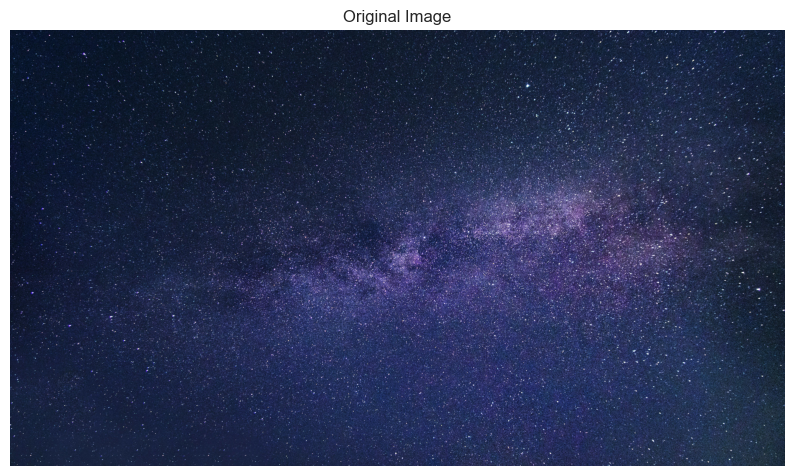

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Load and read image
image = cv2.imread('wmm.jpg')

# Convert from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.title('Original Image')
plt.show()


# 2. convert image from RGB to YCrCb

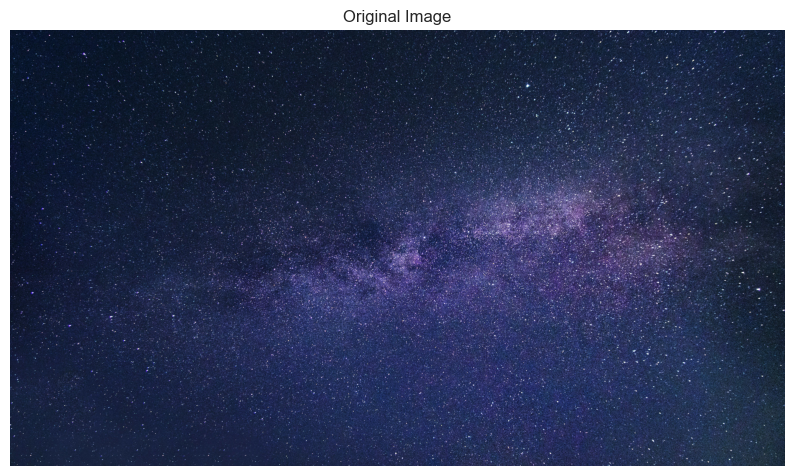

In [12]:
ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.title('Original Image')
plt.show()

# 3. split  Y, Cb, Cr Channel

In [13]:
Y, Cb, Cr = cv2.split(ycbcr)

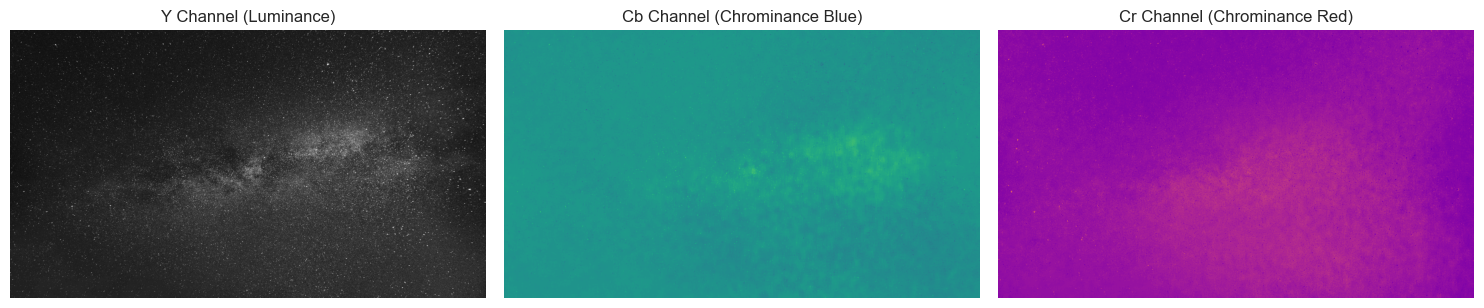

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(Y, cmap='gray')  # Use grayscale colormap
plt.axis('off')
plt.title('Y Channel (Luminance)')

plt.subplot(1, 3, 2)
plt.imshow(Cb, cmap='viridis')  # Use grayscale colormap
plt.axis('off')
plt.title('Cb Channel (Chrominance Blue)')

plt.subplot(1, 3, 3)
plt.imshow(Cr, cmap='plasma')  # Use grayscale colormap
plt.axis('off')
plt.title('Cr Channel (Chrominance Red)')

plt.tight_layout()
plt.show()

# Step 4: Subsample the chrominance channels

![](https://www.researchgate.net/publication/307717916/figure/fig3/AS:667867439706113@1536243414104/Downsampling-chroma-subsampling.ppm)

In [18]:
Cb_subsampled = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2), interpolation=cv2.INTER_LINEAR)
Cr_subsampled = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2), interpolation=cv2.INTER_LINEAR)

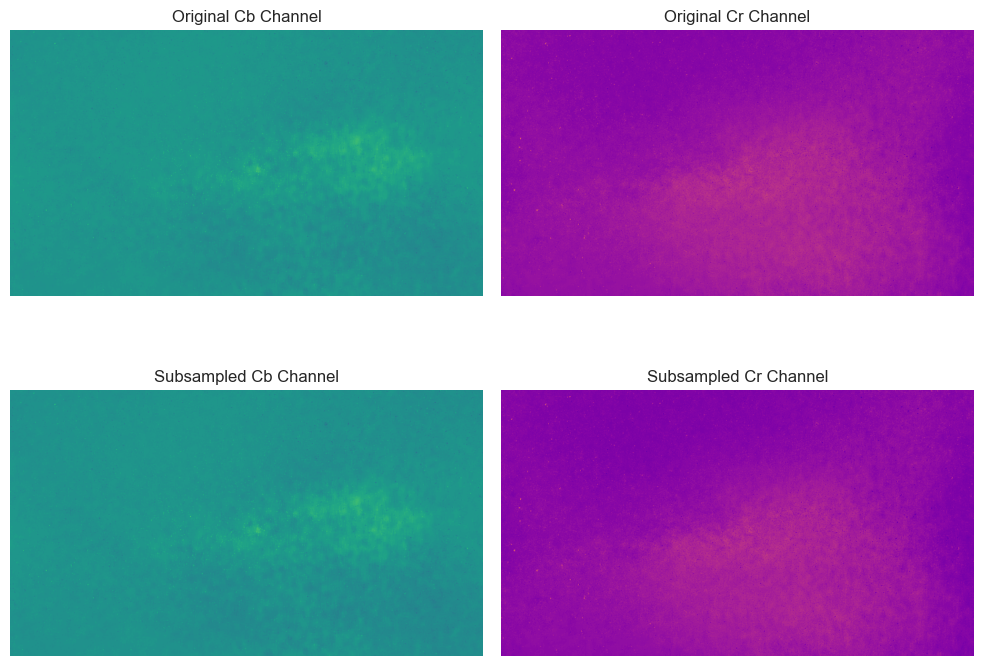

In [19]:
# visual
#  Create a figure to display the channels
plt.figure(figsize=(10, 8))

#  Display original Cb channel
plt.subplot(2, 2, 1)
plt.imshow(Cb, cmap='viridis')
plt.axis('off')
plt.title('Original Cb Channel')

#  Display original Cr channel
plt.subplot(2, 2, 2)
plt.imshow(Cr, cmap='plasma')
plt.axis('off')
plt.title('Original Cr Channel')

#  Display subsampled Cb channel
plt.subplot(2, 2, 3)
plt.imshow(Cb_subsampled, cmap='viridis')
plt.axis('off')
plt.title('Subsampled Cb Channel')

#  Display subsampled Cr channel
plt.subplot(2, 2, 4)
plt.imshow(Cr_subsampled, cmap='plasma')
plt.axis('off')
plt.title('Subsampled Cr Channel')

# 10. Show the plots
plt.tight_layout()
plt.show()

# Step 5: Resize Y channel to match the subsampled Cb and Cr dimensions

In [20]:
Y_resized = cv2.resize(Y, (Cb_subsampled.shape[1], Cb_subsampled.shape[0]), interpolation=cv2.INTER_LINEAR)

Text(0.5, 1.0, 'Resized Y Channel')

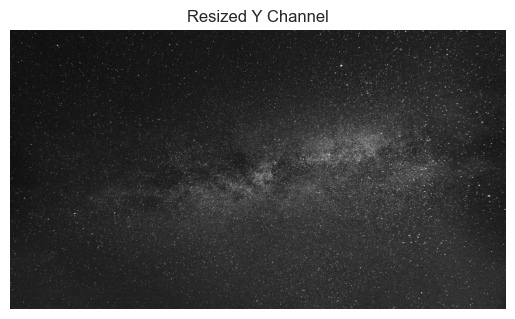

In [21]:
plt.imshow(Y_resized, cmap='gray')
plt.axis('off')
plt.title('Resized Y Channel')

# Step 6: Merge back the resized Y channel and the subsampled Cb and Cr channels


In [22]:
ycbcr_subsampled = cv2.merge([Y_resized, Cb_subsampled, Cr_subsampled])

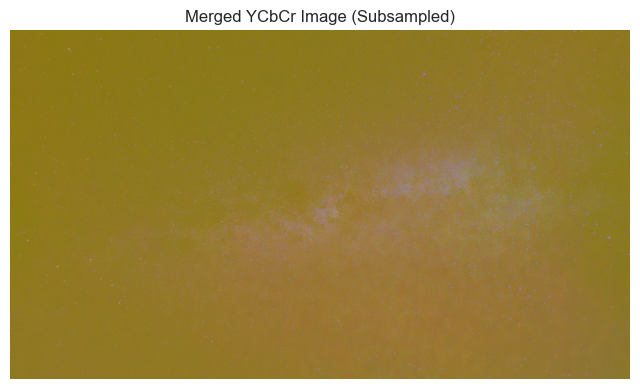

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ycbcr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Merged YCbCr Image (Subsampled)')
plt.show()

# 7. Convert back to BGR for visualization

In [35]:
bgr_subsampled = cv2.cvtColor(ycbcr_subsampled, cv2.COLOR_YCrCb2BGR)

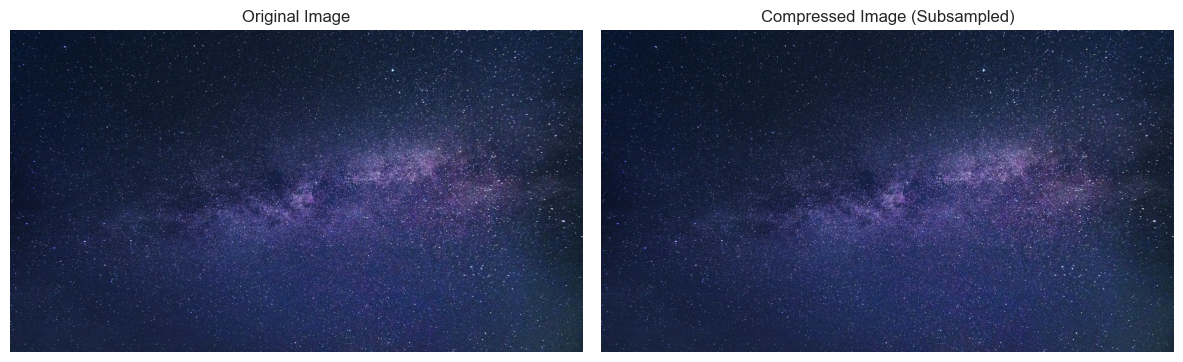

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bgr_subsampled, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Compressed Image (Subsampled)')

plt.tight_layout()
plt.show()

In [37]:
# 8. Calculate sizes of original and compressed images
import os

original_size = os.path.getsize('wmm.jpg')  # Size in bytes
compressed_size = cv2.imencode('.jpg', bgr_subsampled)[1].size  # Size of compressed image in bytes

print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")

Original Image Size: 4992.78 KB
Compressed Image Size: 3138.68 KB


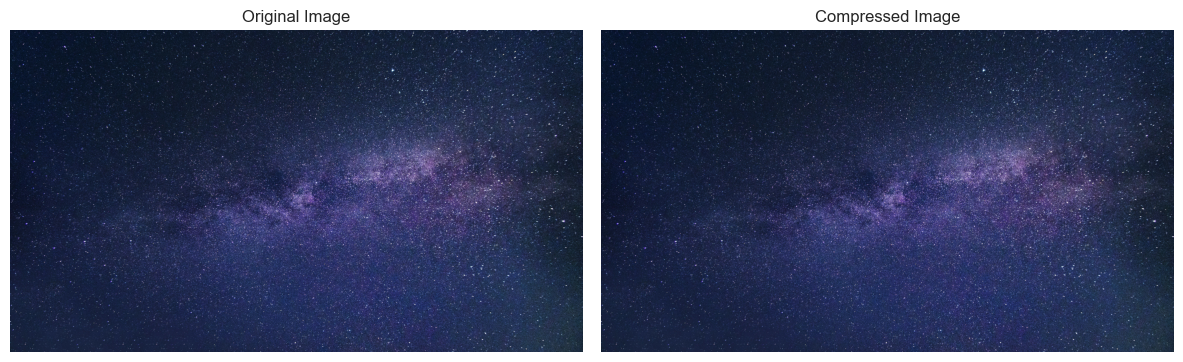

Original Image Size: 4992.78 KB
Compressed Image Size: 3138.68 KB
